In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import os

In [2]:
lunar = pd.read_csv("apollo12_catalog_GradeA_final.csv")
lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq


In [3]:
lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   filename                        76 non-null     object 
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     object 
 2   time_rel(sec)                   76 non-null     float64
 3   evid                            76 non-null     object 
 4   mq_type                         76 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.1+ KB


In [4]:
# Convert 'Abs_Time' to pandas datetime format
lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'])

lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq


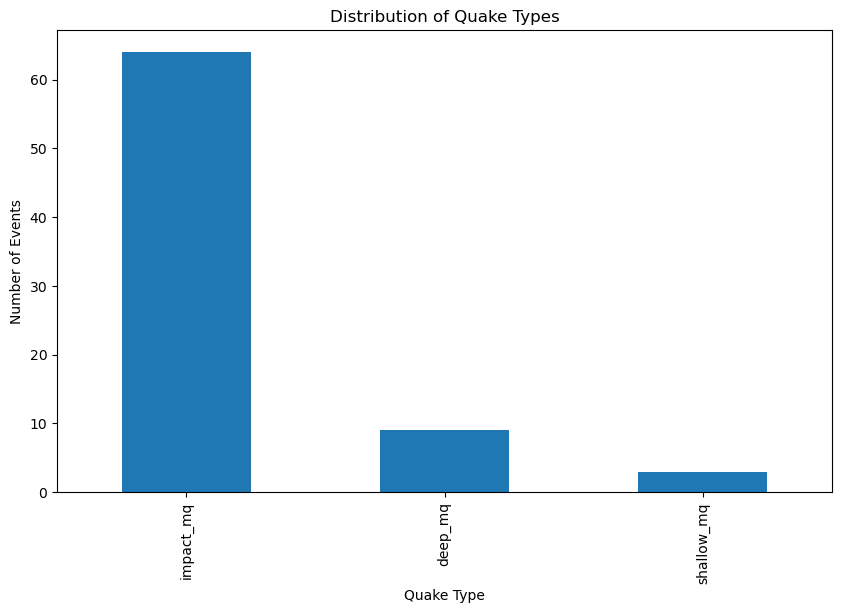

In [5]:
# Plot the distribution of quake types
lunar['mq_type'].value_counts().plot(kind='bar', title="Distribution of Quake Types", figsize=(10, 6))
plt.xlabel("Quake Type")
plt.ylabel("Number of Events")
plt.show()

In [6]:
# Feature Engineering: Extract hour, day, month, etc., from Abs_Time
lunar['Hour'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.hour
lunar['Day'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.day
lunar['Month'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.month
lunar['Year'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.year

In [7]:
# Encode the 'filename' as numeric using LabelEncoder
file_name_encoder = LabelEncoder()
lunar['File_Name_Encoded'] = file_name_encoder.fit_transform(lunar['filename'])

# Encode the target variable 'mq_type' as numeric
quake_type_encoder = LabelEncoder()
lunar['MQ_Type_Encoded'] = quake_type_encoder.fit_transform(lunar['mq_type'])

In [8]:
lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   filename                        76 non-null     object        
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     datetime64[ns]
 2   time_rel(sec)                   76 non-null     float64       
 3   evid                            76 non-null     object        
 4   mq_type                         76 non-null     object        
 5   Hour                            76 non-null     int64         
 6   Day                             76 non-null     int64         
 7   Month                           76 non-null     int64         
 8   Year                            76 non-null     int64         
 9   File_Name_Encoded               76 non-null     int32         
 10  MQ_Type_Encoded                 76 non-null     int32         
dtypes: datet

In [9]:
lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type,Hour,Day,Month,Year,File_Name_Encoded,MQ_Type_Encoded
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq,20,19,1,1970,0,1
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq,3,25,3,1970,1,1
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq,20,26,3,1970,2,1
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq,1,25,4,1970,3,1
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq,14,26,4,1970,4,0


# Applying STA/LTA Algorithm (Apply a Threshold)

In [10]:
# Extract the seismic signal  by Relative Time
signal = lunar['time_rel(sec)'].values

In [11]:
def sta_lta(signal, sta_len, lta_len):
    """
    Calculate STA/LTA ratio.

    signal: array-like, the seismic data signal
    sta_len: int, length of short-term average window in samples
    lta_len: int, length of long-term average window in samples
    """
    # Calculate short-term average (STA)
    sta = np.convolve(signal, np.ones(sta_len) / sta_len, mode='same')
    
    # Calculate long-term average (LTA)
    lta = np.convolve(signal, np.ones(lta_len) / lta_len, mode='same')

    # Avoid division by zero
    lta[lta == 0] = np.nan

    # Calculate STA/LTA ratio
    sta_lta_ratio = sta / lta

    return sta, lta, sta_lta_ratio

In [12]:
sta_length = 5    # Short-term average window length
lta_length = 50   # Long-term average window length

sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)

In [13]:
threshold = 1.5 # threshold for detection

# Create an array for event detection based on the threshold
detected_events = sta_lta_ratio > threshold

In [14]:
event_times = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
print("Detected Events:\n", event_times)

Detected Events:
 2    1970-03-26 20:17:00
3    1970-04-25 01:14:00
4    1970-04-26 14:29:00
5    1970-06-15 19:00:00
6    1970-06-26 20:01:00
7    1970-07-20 05:06:00
8    1970-07-20 11:44:00
9    1970-09-26 19:57:00
10   1970-10-24 11:31:00
11   1970-11-12 12:50:00
12   1970-12-11 07:22:00
14   1970-12-31 15:41:00
15   1971-01-15 12:40:00
56   1973-07-29 23:31:00
58   1974-01-10 23:21:00
59   1974-02-07 06:21:00
60   1974-02-12 22:30:00
61   1974-03-25 16:58:00
62   1974-04-08 08:40:00
63   1974-04-19 18:34:00
70   1974-07-17 12:05:00
71   1974-10-14 17:43:00
72   1975-04-12 18:15:00
73   1975-05-04 10:05:00
Name: time_abs(%Y-%m-%dT%H:%M:%S.%f), dtype: datetime64[ns]


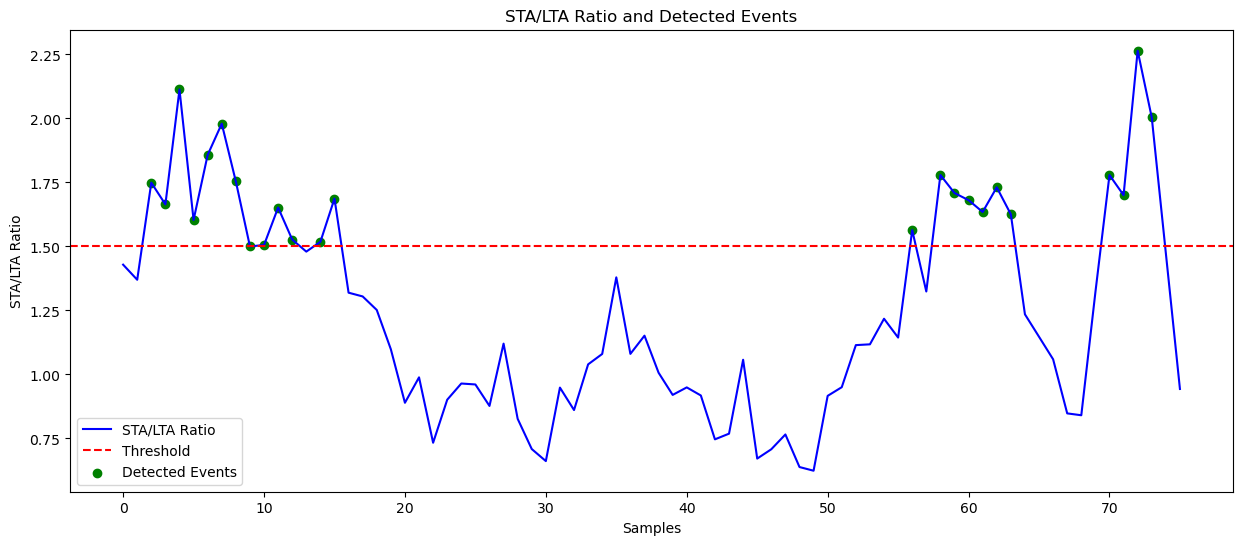

In [15]:
plt.figure(figsize=(15, 6))

plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')

plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')

plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()

# By Machine Learning Model

In [16]:
signal = lunar['time_rel(sec)'].values

In [17]:
sta_length = 5
lta_length = 50
sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)

In [18]:
lunar['STA'] = sta
lunar['LTA'] = lta
lunar['STA/LTA'] = sta_lta_ratio

In [20]:
X = lunar[['STA', 'LTA', 'STA/LTA']]  # Features
y = lunar['MQ_Type_Encoded']  # Labels

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 0  1  0]
 [ 1 13  0]
 [ 0  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.93      0.90        14
           2       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.29      0.31      0.30        16
weighted avg       0.76      0.81      0.78        16



C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


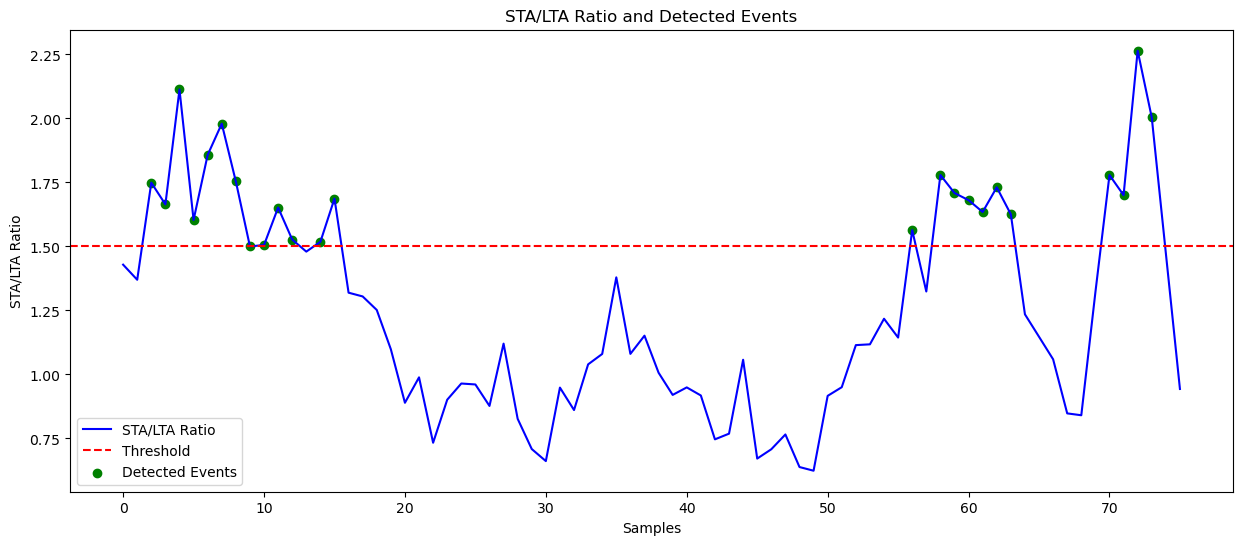

In [24]:
plt.figure(figsize=(15, 6))

plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(1.5, color='red', linestyle='--', label='Threshold')  # Change threshold if needed

detected_events = sta_lta_ratio > 1.5
plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')

plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()